## GradientDescentDemo

### 在進行實作之前，先介紹一些學習優化器(Optimizer)的種類：

1. SGD-準確率梯度下降法 (stochastic gradient decent)
SGD 也就是最單純的gradient decent 方法，找出參數的梯度(利用微分的方法)，往梯度的方向去更新參數(weight)，即：

![.](image/stochastic.png)

W 為權重(weight)參數，L 為損失函數(loss function)， η 是學習率(learning rate)， ∂L/∂W 是損失函數對參數的梯度(微分)

2. Momentum 
Momentum 是「運動量」的意思，此優化器為模擬物理動量的概念，在同方向的維度上學習速度會變快，方向改變的時候學習速度會變慢。

    "一顆球從山上滾下來，在下坡的時候速度越來越快，遇到上坡，方向改變，速度下降"
    
![.](image/Momentum_Weight_update_equation.png)
    
這裡多了一個 Vt 的參數，可以將他想像成「方向速度」，會跟上一次的更新有關，如果上一次的梯度跟這次同方向的話，|Vt|(速度)會越來越大(代表梯度增強)，W參數的更新梯度便會越來越快，如果方向不同，|Vt|便會比上次更小(梯度減弱)，W參數的更新梯度便會變小， β 可以想像成空氣阻力或是地面摩擦力，通常設定成0.9

3. AdaGrad (等等會用到的優化器)
對於Optimizer來說，learning rate(學習率) η 相當的重要，太小會花費太多時間學習，太大有可能會造成overfitting，無法正確學習，前面幾種Optimizer的學習率 η，都為固定值，而AdaGrad就是會依照梯度去調整 learning rate η 的優化器，Ada對我來說就是Adaptive的意思

![.](image/AdaGrad_Weight_update_equation.png)

在AdaGrad Optimizer 中，η 乘上 1/√(n+ϵ) 再做參數更新，出現了一個n的參數，n為前面所有梯度值的平方和，利用前面學習的梯度值平方和來調整learning rate ，ϵ 為平滑值，加上 ϵ 的原因是為了不讓分母為0，ϵ 一般值為1e-8

 - 前期梯度較小的時候，n較小，能夠放大學習率
 - 後期梯度較大的時候，n較大，能夠約束學習率，但分母上梯度平方的累加會越來越大，會使梯度趨近於0，訓練便會結束，為了防止這個情況，後面有開發出 **RMSprop Optimizer** ，主要就是把n變成RMS(均方根)，在這邊就不多做說明了

4. Adam
Adam Optimizer 其實可以說就是把前面介紹的Momentum 跟 AdaGrad這二種Optimizer做結合
Adam 保留了 Momentum 對過去梯度的方向做梯度速度調整與Adam對過去梯度的平方值做learning rate的調整，再加上Adam有做參數的 **偏離校正**，使得每一次的學習率都會有個確定的範圍，會讓參數的更新較為平穩。
![.](image/adam.png)
![.](image/adam2.png)
![.](image/adam3.png)
![.](image/adam4.png)
    Adam為目前較常使用的Optimizer
    
最後附上各個 Optimizer 的比較
![.](image/all_opt.png)

[資料來源](https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db)

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import random as random
import numpy as np
import csv

In [5]:
x_data = [ 338.,  333.,  328. , 207. , 226.  , 25. , 179. ,  60. , 208.,  606.]
y_data = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]

In [6]:
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1) #weight
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

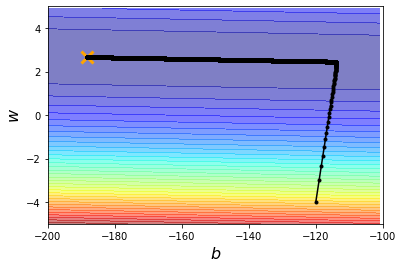

In [7]:
# ydata = b + w * xdata 
b = -120 # initial b
w = -4 # initial w
lr = 1 # learning rate
iteration = 100000

b_lr = 0.0
w_lr = 0.0

# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
    
    # Update parameters.
    b = b - lr/np.sqrt(b_lr) * b_grad 
    w = w - lr/np.sqrt(w_lr) * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()